## Practice Midterm

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import re

In [254]:
#read in the data
trails = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Midterm/national_park_trails.csv")
trails.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [6]:
df = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Midterm/national_park_trails.csv")
trail_counts = ((df['state_name'].isin(['Colorado', 'Alaska', 'California'])) & (df['length'] > 10000)).value_counts()
trail_counts

False    2786
True      527
Name: count, dtype: int64

## Part 1: Short Answer

### Question 1.1 [10 points]
What is the length in miles of the fourth longest trail in California?

In [255]:
#order length in ascending order
ca_trails = trails[trails["state_name"] == "California"]
length_list = list(ca_trails["length"])
#sort only works on list
length_list.sort(reverse = True)
meters4 = length_list[3]
miles4 = meters4/1609.34
print(miles4) 

145.20000000000002
145.20000000000002


### Question 1.2 [10 points]
Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

In [256]:
#filter to be "easy"
#5 kilometers is 
easy = trails[(trails["elevation_gain"] < 500) & (trails["length"] < (5*1000)) & (trails["difficulty_rating"] < 4)]
#sort to california
ca_easy = easy[easy["state_name"] == "California"]
#find the max of avg_rating column
ca_easy_sorted = ca_easy.sort_values("avg_rating", ascending = False)
ca_easy_sorted.iloc[0]


trail_id                                         10024378
name                             Saline Valley Hot Spring
area_name                      Death Valley National Park
city_name                                       Lone Pine
state_name                                     California
country_name                                United States
_geoloc              {'lat': 36.83402, 'lng': -117.73855}
popularity                                         6.1221
length                                            482.802
elevation_gain                                        0.0
difficulty_rating                                       1
route_type                                   out and back
visitor_usage                                         1.0
avg_rating                                            5.0
num_reviews                                             4
features               ['dogs-no', 'kids', 'hot-springs']
activities                          ['hiking', 'walking']
units         

## Question 1.3 [15 points]
How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)

In [257]:
#turn names into one long list
names = list(trails["area_name"])
one_name = " ".join(names)
#use regular expressions
lands = re.findall(r"[Ll]and", one_name)
len(lands)

109

### Question 1.4 [15 points]
Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

Your job in this question is to create the np_trails_new object. You’ll know when you have succeeded, because the code provided will produce the plot.

In Canvas, turn in the values of the first row of the np_trails_new object.

(If your dataset has more columns than seem to be available, only include the ones that were absolutely necessary to keep in this analysis.)

In [258]:
#measure variable has avg_rating, difficulty_rating, visitor_useage, and popularity
#score is the score
#thinking of a pivoted dataset from wide to long (use .melt())
np_trails_new = trails.melt(
    id_vars=["name"], 
    value_vars=["avg_rating", "difficulty_rating", "visitor_usage", "popularity"], 
    var_name="measure", 
    value_name="score"
)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 253 rows containing non-finite values.


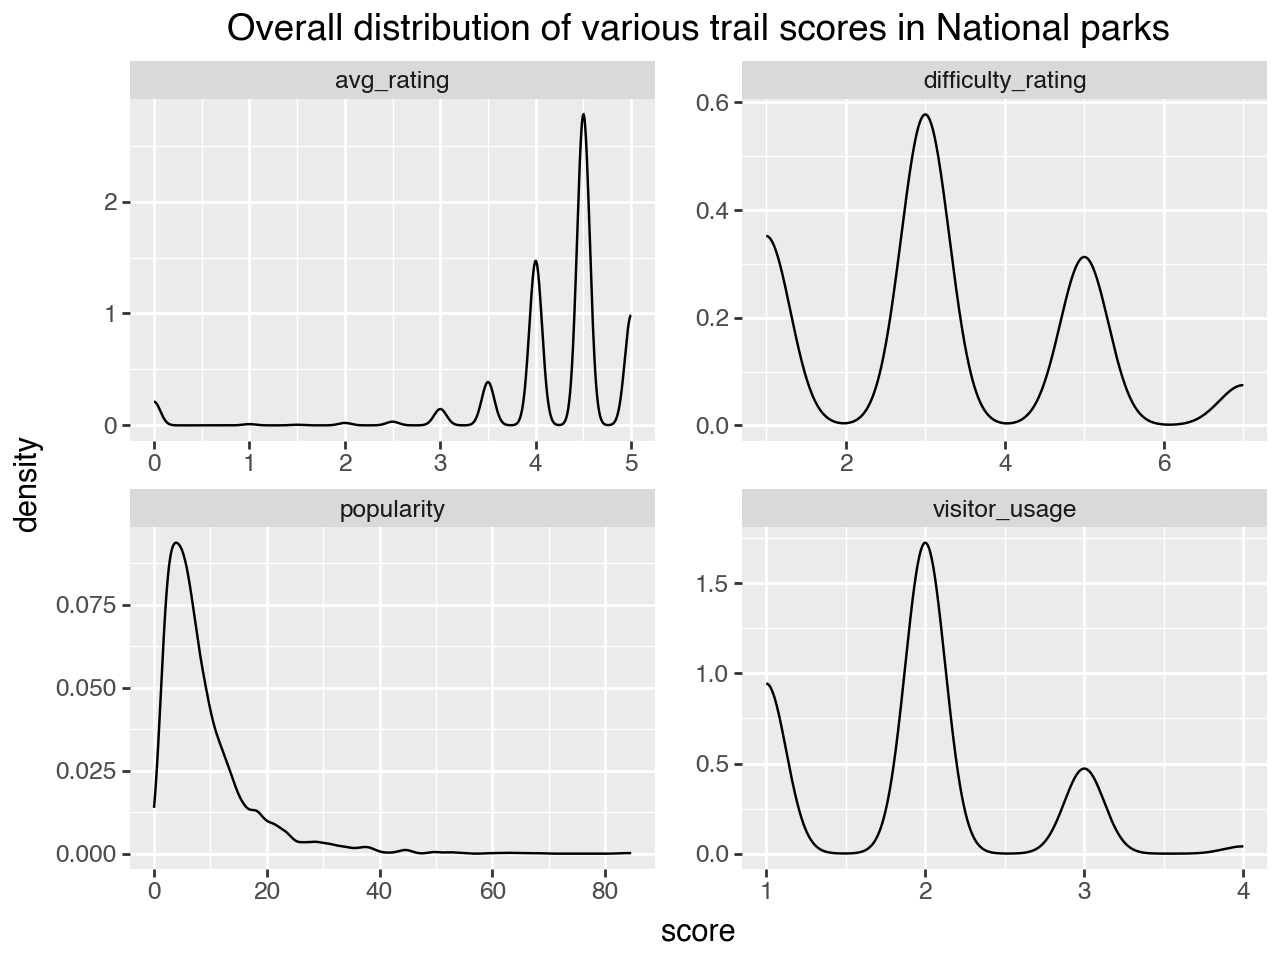

In [259]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails_new, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

### Question 1.5 [20 points]
Recreate the plot below, by filling in the blanks in the code on Canvas.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scale.py:130: PlotnineWarning: scale_x_discrete could not recognise parameter `Guide`
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


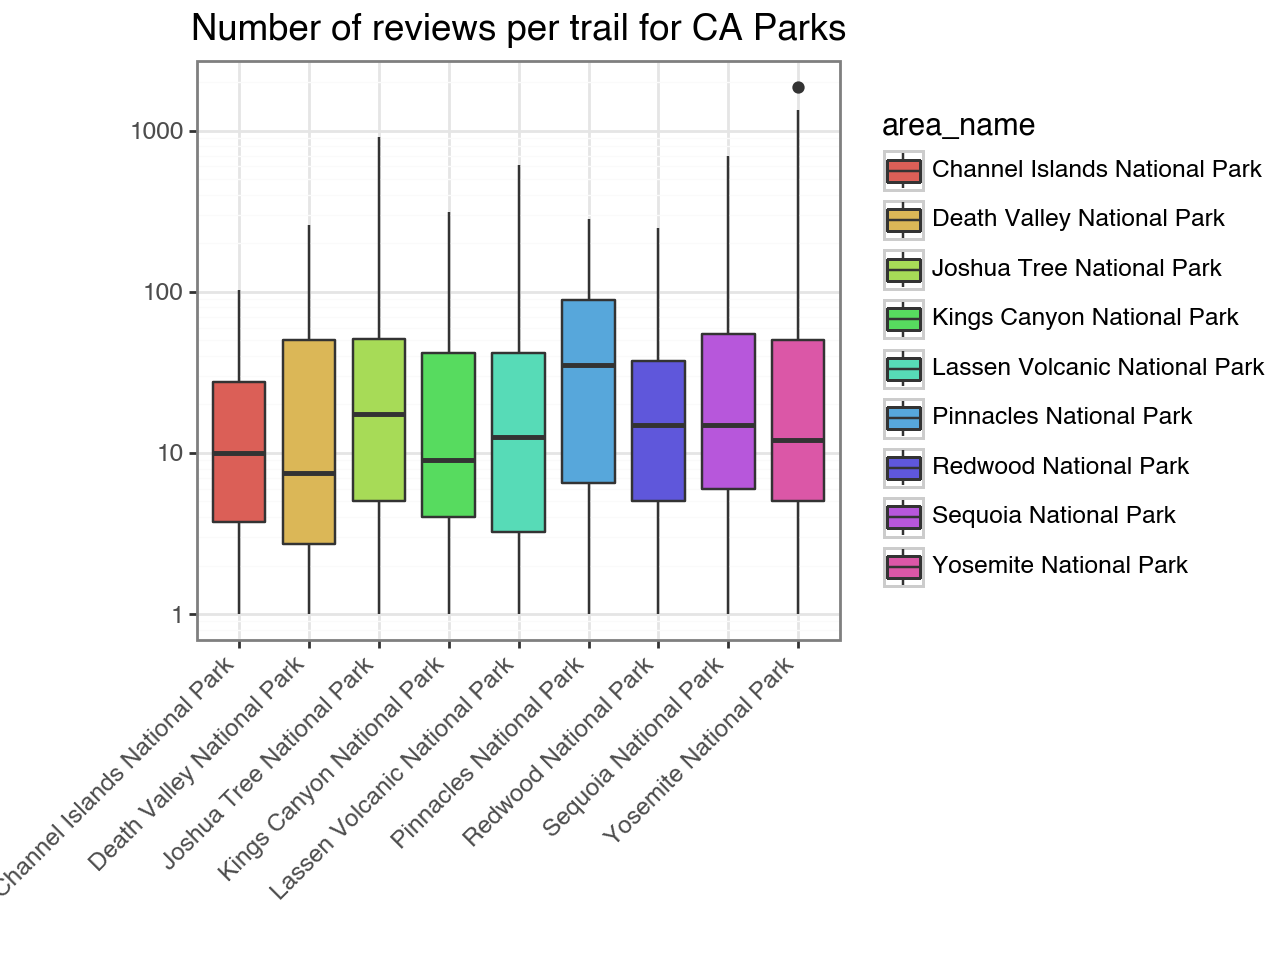

In [260]:
from plotnine import *
from plotnine.scales import scale_y_log10

#filter for those parks
ca_parks = trails[(trails["state_name"]  == "California")]
                    
(ggplot(ca_parks, aes(x="area_name", y="num_reviews", fill = "area_name"))
+ geom_boxplot()
+ scale_x_discrete(Guide = False) 
+ scale_y_log10()
+ labs(
  x = " ",
  y = " ",
  title = "Number of reviews per trail for CA Parks"
)
+ theme_bw()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)

## Part 2: Programming

### Question 2.1 [30 points]
Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

A minimum trail elevation gain (in meters)
A maximum trail elevation gain (in meters)
A minimum trail rating
The type of trail
(Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

Here is some starter code for this function:

In [261]:
import numpy as np

def recommend_trails(dataset, park, min_elev= None, max_elev=np.inf, min_rate=0, trail_type=None):
    # Step 1: Filter by park name
    park_trails = dataset[dataset["area_name"] == park]
  
    # Step 2: Filter by elevation gain
    elevation_change = park_trails[(park_trails["elevation_gain"] >= min_elev) &
                                   (park_trails["elevation_gain"] <= max_elev)]
    
    # Step 3: Filter by rating
    rate_filtered = elevation_change[elevation_change["avg_rating"] >= min_rate]

    # Step 4: Filter by trail type, if specified
    if trail_type:
        final_trails = rate_filtered[rate_filtered["route_type"] == trail_type]
    else:
        final_trails = rate_filtered
    
    # Return the filtered trails
    return final_trails

# Example call
recommend_trails(trails, "Haleakala National Park", min_elev=1000, min_rate=4)


,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,2.0,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,1.0,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m


### Question 2.2 [30 points]
It’s reasonable to think we might also want to search for hikes according to climate. Therefore, we will scrape the average temperatures for each U.S. state from the following website:

https://www.extremeweatherwatch.com/us-state-averages
Write a function that takes one optional arguent, month.

The function should scrape the temperature website above for the desired month. If no month is specified then it should scrape the overall average temperatures. The function should return a data frame of the temperatures for the specified month in the names of the temperature columns.

Here is some starter code for this function:

In [262]:
def scrape_temps(month = None):
  
  my_url = "https://www.extremeweatherwatch.com/us-state-averages"
  response = requests.get(my_url)
  soup = BeautifulSoup(response.content, "html.parser")
  
  return ______

# Additional Practice Questions (Generated by ChatGPT)

## Coding Based

### 1. What is the average elevation gain of all trails in Alaska with a difficulty rating of 4 or higher?

In [263]:
alaska_trails = trails[(trails["state_name"] == "Alaska") & (trails["difficulty_rating"] >= 4)]
mean_gain = alaska_trails["elevation_gain"].mean()
print(mean_gain)

1027.3066285714285
1027.3066285714285


### 2. Which state has the most trails that are loop-type?

**Filtering**
loop_1 = trails[trails["route_type"] == "loop"]
**Using Lambda and apply (could also do Map)**
loop2 = trails[trails["route_type"].apply(lambda i: "loop" in i)]

In [264]:
loop_trails = trails[trails["route_type"] == "loop"]
state_counts = loop_trails.groupby("state_name").size().reset_index(name = "count")
#sort
state_counts.sort_values("count", ascending = False).head()

,state_name,count
3,California,237
10,Maine,98
28,Wyoming,94
26,Virginia,82
27,Washington,76


### 3. What is the total number of reviews for trails with the birding feature in their description?
LAMBDA

In [265]:
bird_trails = trails[trails["activities"].apply(lambda x: "birding" in x)]
total_reviews = bird_trails["num_reviews"].sum()
print(total_reviews)

160501
160501


### 4. What is the average trail popularity for all trails in Yosemite National Park?

In [266]:
yosemite = trails[trails["area_name"] == "Yosemite National Park"]
yosemite["popularity"].mean()

#alternatively
trails[trails["area_name"] == "Yosemite National Park"][["popularity"]].mean()

popularity    9.235686
dtype: float64

### 5. How many trails are categorized as both “hiking” and “birding” activities in California?
LAMBDA

In [267]:
trails_ca = trails[trails["state_name"] == "California"]
ca_hike_bird = trails_ca[trails_ca["activities"].apply(lambda x: "hiking" in x and "birding" in x)]
ca_hike_bird["name"].count()

410

### 6. What percentage of trails in the United States have a 5-star average rating?

In [268]:
total_trails = trails["name"].count()
five_star = trails[trails["avg_rating"] == 5][["name"]].count()

five_star/total_trails

name    0.162692
dtype: float64

### 7. Which city has the highest number of trails with the ‘waterfall’ feature?

In [269]:
waterfall = trails[trails["features"].apply(lambda x: "waterfall" in x)]
trails_by_city = waterfall.groupby("city_name")[["name"]].count()
trails_by_city.idxmax()

name    Yosemite Valley
dtype: object

### 8. Find the trail with the highest difficulty rating in Denali National Park that also has a length shorter than 8 kilometers.

In [270]:
denali_short = trails[(trails["area_name"] == "Denali National Park") & (trails["length"] < 8*1000)]
sorted_denali = denali_short.sort_values("difficulty_rating", ascending = False)
sorted_denali.iloc[0]


trail_id                                                    10327620
name                                      Mount Thorofare Ridge Loop
area_name                                       Denali National Park
city_name                                                   Cantwell
state_name                                                    Alaska
country_name                                           United States
_geoloc                         {'lat': 63.43108, 'lng': -150.31096}
popularity                                                     5.799
length                                                      6598.294
elevation_gain                                              507.7968
difficulty_rating                                                  5
route_type                                                      loop
visitor_usage                                                    1.0
avg_rating                                                       4.5
num_reviews                       

### 9. How many trails have more than 50 reviews but a popularity score of less than 4?

In [271]:
trails[(trails["num_reviews"] > 50) & (trails["popularity"] < 4)][["name"]].count()

name    5
dtype: int64

## Pivoting

### 10. Reshape the dataset so that instead of having the columns popularity, length, and elevation_gain, these values appear in a single "metric" column with a corresponding "value" column. Keep the trail_id, name, and state_name as identifier columns.

PIVOT LONGER

In [272]:
long_trails = trails.melt(
    id_vars = ["trail_id", "name", "state_name"], 
    value_vars = ["popularity", "length", "elevation_gain"],
    var_name = "metric",
    value_name = "value"
    )

### 11. Reshape the above dataset so that instead of having multiple rows for each trail, with columns for popularity, length, and elevation_gain, each of these metrics becomes a column of its own. Each trail should appear once, with popularity, length, and elevation_gain as separate columns.

In [273]:
wide_trails = long_trails.pivot(
    index = ["trail_id","name", "state_name"], 
    columns = "metric", 
    values = "value")

## Function Creation

### 12. Write a function that takes the trail name as input and returns the corresponding area name.

In [274]:
def get_area_name(trail_name):
    area_name = trails[trails["name"] == trail_name][["area_name"]]
    
    return area_name

get_area_name("Lookout Point Trail")

,area_name
605,Yosemite National Park


### 13. Create a function that calculates and returns the total elevation gain of a list of trails.

In [275]:
def total_elev_gain(list_trails):
    trails_in_list = trails[trails["name"].isin(list_trails)]
    elev_gain = trails_in_list["elevation_gain"].sum()

    return elev_gain

total_elev_gain(["Lookout Point Trail", "North Rim Trail"])

2242.7184

### 14. Write a function that returns all the trails that are "out and back" type.

In [276]:
def out_n_back(dataset):
    out_back_trails = dataset[dataset["route_type"] == "out and back"][["name"]]

    return out_back_trails

out_n_back(trails)

,name
0,Harding Ice Field Trail
1,Mount Healy Overlook Trail
2,Exit Glacier Trail
4,Triple Lakes Trail
5,Bison Gulch
...,...
3306,Leleiwi Overlook Trail
3307,Pa ka'oao Trail (White Hill Trail)
3309,Keonehe'ehe'e Trail
3310,Red Hill Overlook Summit Trail


### 15. Create a function that returns the average length of trails based on their difficulty rating.

group by difficulty and find the average length

In [277]:
def avg_length(dataset):
    average_length = dataset.groupby("difficulty_rating")[["length"]].mean()

    return average_length

avg_length(trails)

,length
difficulty_rating,
1,7621.179593
3,15139.647299
5,28301.890048
7,40144.472681


### 16. Write a function that returns trails that have lake and forest specific features.

In [278]:
def lake_forest_trails(dataset):
    lake_forest = dataset[dataset["features"].apply(lambda x: "lake" in x and "forest" in x)][["name"]]

    return lake_forest

lake_forest_trails(trails)

,name
3,Horseshoe Lake Trail
11,Tiaga Loop and Horseshoe Lake Trail to Beaver Dam
21,Bartlett River Trail
25,Bartlet Lake Trail
27,Tlingit Trail
...,...
3241,East Shore Yellowstone Lake and Heart Lake to ...
3248,Tern Lake Trail
3253,"Boundary Creek, Bechler Meadows and Bechler River"
3254,Sportsman Lake Trail


## Lambda Expressions

### 17. Calculate the Length of Each Trail in Kilometers using lambda

In [279]:
trails_new = trails
trails_new["length_km"] = trails_new["length"].apply(lambda x: x/1000)

### 18. Categorize Trails Based on Difficulty Rating (1&3 Easy, 5 medium, 7 hard)

In [280]:
trails_new["cat_difficulty"] = trails_new["difficulty_rating"].apply(lambda x: "easy" if (x == 1 or x == 3)
                                                                        else("medium" if x == 5
                                                                        else("hard")))

### 19. Create a new column that calculates the popularity score as a percentage of the maximum popularity score in the dataset.

In [281]:
#max popularity
max_pop = trails_new["popularity"].max()
trails_new["prop_popularity"] = trails_new["popularity"].apply(lambda x: x/max_pop*100)
trails_new["prop_popularity2"] = trails_new.apply(lambda x: x["popularity"]/max_pop*100, axis = 1)

### 20. 4. Create a List of Features as a String

In [282]:
# THIS DOES NOT WORK PROPERLY
trails_new["features_string"] = trails_new["features"].apply(lambda x: ", ".join(x))

### Calculating Popularity Score Using a Lambda Function with Two Columns
### TWO COLUMN LAMBDA

In [283]:
# Using apply() with a lambda function to calculate popularity score
trails_new['popularity_score'] = trails_new.apply(lambda row: row['popularity'] * row['avg_rating'], axis=1)


## Map

### 21. 1. Map trail difficulty (variable created earlier in question 18) to a numerical scale

In [284]:
difficulty_map = {
    "easy": 1,
    "medium": 2,
    "hard": 3
}

trails_new["difficulty_map"] = trails_new["cat_difficulty"].map(difficulty_map)

### 22. Map the state names to their abbreviations (only do this for California, Colorado, and Texas)

In [285]:
abreviations = {
    "California": "CA",
    "Colorado": "CO",
    "Texas": "TX"
}

trails_new["abreviated"] = trails_new["state_name"].map(abreviations).fillna(trails_new["state_name"])

### 23. Mapping Trail Length to Descriptions

In [286]:
trails_new['length_category'] = trails_new['length_km'].map(lambda x: 'Short' if x < 5 else ('Medium' if x < 15 else 'Long'))

### 24.  Mapping Popularity to Ranges

In [287]:
trails_new['popularity_label'] = trails_new['popularity'].map(lambda x: 'Low' if x < 10 else ('Moderate' if x < 20 else 'High'))